# CNN for classification of CIFAR-10 dataset

## Imports and dataset loading

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10

In [62]:
classnames = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

m = x_train.shape[0]
num_classes = 10

print('x_train shape:', x_train.shape)
print(m, 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Dataset visualization

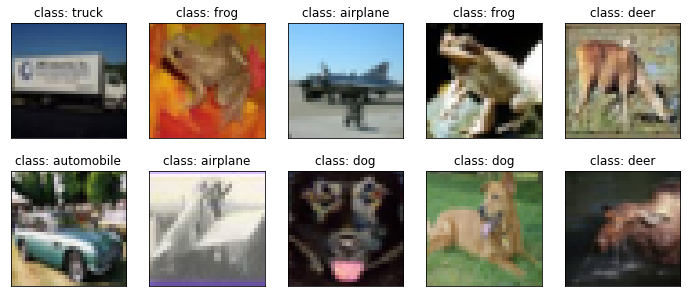

In [81]:
nrows, ncols = 2, 5
idx = np.random.choice(m, nrows * ncols)
fig = plt.figure(figsize=(12, 5))
for i in range(1, nrows * ncols +1):
    fig.add_subplot(nrows, ncols, i)
    plt.imshow(x_train[idx[i-1]])
    plt.title(f'class: {classnames[y_train[idx[i-1]][0]]}')
    plt.xticks([])
    plt.yticks([])   


## Data normalization and encoding
Normalizes the RGB values of the input to [0,1] interval and encodes the output classes to a 10 dimensional 1-hot vector.

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## The model

In [30]:
input_shape = x_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                62730     
__________

## Model training
The cross validation is done on 20% of the dataset.

In [31]:
batch_size = 32
epochs = 5

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    shuffle=True
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 6s 142us/step - loss: 1.4919 - acc: 0.4668 - val_loss: 1.2294 - val_acc: 0.5697
Epoch 2/5
40000/40000 [==============================] - 5s 134us/step - loss: 1.1019 - acc: 0.6137 - val_loss: 1.0789 - val_acc: 0.6159
Epoch 3/5
40000/40000 [==============================] - 5s 135us/step - loss: 0.9598 - acc: 0.6674 - val_loss: 1.0310 - val_acc: 0.6444
Epoch 4/5
40000/40000 [==============================] - 5s 135us/step - loss: 0.8672 - acc: 0.7008 - val_loss: 0.9923 - val_acc: 0.6548
Epoch 5/5
40000/40000 [==============================] - 5s 135us/step - loss: 0.7963 - acc: 0.7256 - val_loss: 1.0101 - val_acc: 0.6603


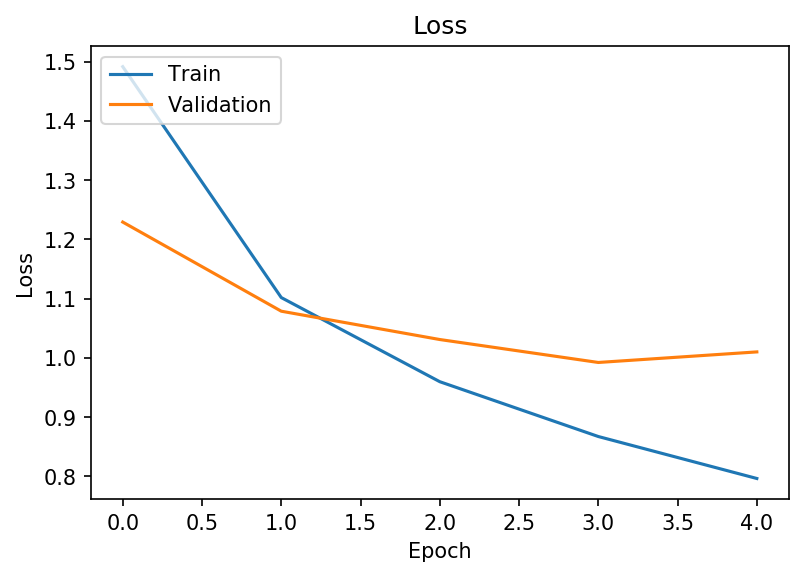

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model testing
Evaluate the model in unseen data.

In [29]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
for i, score in enumerate(scores):
    print(f'Test {model.metrics_names[i]}: {score}')

10000/10000 [==============================] - 0s 50us/step
Test loss: 0.9933320755004883
Test acc: 0.6606
